In [3]:
import pandas as pd  
import talib
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt
import akshare as ak
import numpy as np
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
class my_strategy2(bt.Strategy):
    #全局设定交易策略的参数

    def __init__(self):
        # 初始化交易指令、买卖价格和手续费
        self.order = None

    def next(self):
        # 检查是否持仓 
        if not self.position: # 没有持仓
            #self.order = self.buy(size=500)
            #self.order_target_value(target=10000)
            #self.order_target_size(target=10000)(佣金)
            self.order_target_percent(target=0.7)
            #print(self.datetime.date(0),self.position)

In [4]:
class my_strategy_ma30(bt.Strategy):
    #全局设定交易策略的参数

    def __init__(self):
        # 初始化交易指令、买卖价格和手续费
        self.order = None

    def next(self):
        # 检查是否持仓 
        if not self.position: # 没有持仓
            #self.order = self.buy(size=500)
            #self.order_target_value(target=10000)
            #self.order_target_size(target=10000)(佣金)
            self.order_target_percent(target=0.7)
            #print(self.datetime.date(0),self.position)

In [5]:
def get_data(symbol,start_date,end_date):
    stock_pinan = ak.stock_zh_a_hist(symbol=symbol, period="daily", start_date=start_date, end_date=end_date, adjust="qfq")
    stock_pinan.columns=['date','股票代码',"open","close","high","low","volume",'成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
    stock_pinan["date"]=pd.to_datetime(stock_pinan["date"])
    stock_pinan['openinterest']=0
    stock_pinan.set_index("date",inplace=True)
    return stock_pinan[["open","high","low","close","volume","openinterest"]]
start="20100101"
end='20200331'
stock_pinan=get_data("600000",start,end)

In [6]:
stock_pinan

,open,high,low,close,volume,openinterest
date,,,,,,
2010-01-04,4.20,4.22,3.93,3.94,661913,0
2010-01-05,4.03,4.10,3.77,4.01,1151479,0
2010-01-06,3.98,3.99,3.81,3.83,967826,0
2010-01-07,3.81,3.88,3.57,3.64,852361,0
2010-01-08,3.59,3.78,3.57,3.73,657076,0
...,...,...,...,...,...,...
2020-03-25,8.07,8.14,7.99,8.02,321723,0
2020-03-26,7.97,8.24,7.95,8.10,309218,0
2020-03-27,8.22,8.25,8.07,8.11,271080,0


In [6]:
def huice_run(start,end,stock,strategy):
  # 加载数据
    data = bt.feeds.PandasData(dataname=stock,fromdate=start,todate=end)

    # 初始化cerebro回测系统设置                           
    cerebro = bt.Cerebro()  
    #将数据传入回测系统
    cerebro.adddata(data) 
    # 将交易策略加载到回测系统中
    cerebro.addstrategy(strategy) 
    # 设置初始资本为10,000
    startcash = 10000
    cerebro.broker.setcash(startcash) 
    # 设置交易手续费为 0.2%
    cerebro.broker.setcommission(commission=0.002) 


    print(start.date(),end.date())
    print('初始资金: %.2f' % cerebro.broker.getvalue())
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name = 'SharpeRatio')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='DW')
    results = cerebro.run()
    strat = results[0]
    print('最终资金: %.2f' % cerebro.broker.getvalue())
    print('夏普比率:', strat.analyzers.SharpeRatio.get_analysis())
    print('回撤指标:', strat.analyzers.DW.get_analysis())
    
    return cerebro
# huice_result=huice_run(datetime(2010, 3, 31),datetime(2020, 3, 31),stock_pinan,my_strategy2)

In [8]:
# %matplotlib inline
# huice_result.plot(style='candlestick', iplot=False, block=True)

[[<Figure size 640x480 with 4 Axes>]]

In [9]:
start="20180301"
end='20230301'
stock_byd=get_data("002594",start,end)

In [4]:
class my_strategy_time(bt.Strategy):
    #全局设定交易策略的参数

    def __init__(self):
        # 初始化交易指令、买卖价格和手续费
        self.order = None

    def next(self):
        # 检查是否持仓 
        if self.datetime.date(0)==datetime(2019, 6, 24).date(): # 没有持仓
            #self.order = self.buy(size=500)
            #self.order_target_value(target=10000)
            #self.order_target_size(target=10000)(佣金)
            self.order_target_percent(target=0.99)
            #print(self.datetime.date(0),self.position)

In [10]:
huice_result=huice_run(datetime(2018, 3, 1),datetime(2023, 3, 1),stock_byd,my_strategy_time)

2018-03-01 2023-03-01
初始资金: 10000.00
最终资金: 56317.13
夏普比率: OrderedDict({'sharperatio': 0.48795021639349034})
回撤指标: AutoOrderedDict({'len': 167, 'drawdown': 25.125761158600014, 'moneydown': 18898.5, 'max': AutoOrderedDict({'len': 167, 'drawdown': 46.85423440377656, 'moneydown': 26563.25})})


<IPython.core.display.Javascript object>

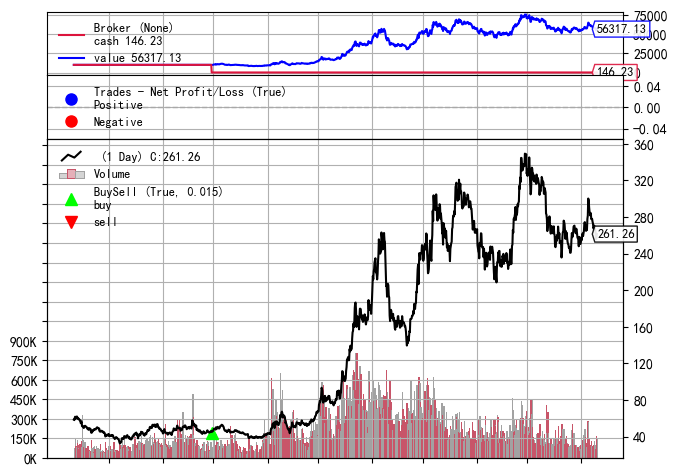

In [11]:
#%matplotlib inline 
huice_result.plot()[0][0]

In [12]:
talib.SMA(stock_pinan.close,20).head(11)

date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-18   NaN
dtype: float64

In [13]:
stock_byd_close=stock_byd.close
stock_byd_close_30=talib.SMA(stock_byd.close,30)

In [14]:
%matplotlib inline 
stock_byd_close.plot(figsize=(18,5))
stock_byd_close_30.plot()

<Axes: xlabel='date'>

In [15]:
i_1 = stock_byd_close_30.index[0]
buy_date =[]
sell_date =[]
for i in stock_byd_close_30.index[1:]:
    if stock_byd_close[i]>stock_byd_close_30[i]and stock_byd_close[i_1] < stock_byd_close_30[i_1]:
        buy_date.append(i.date())
    if stock_byd_close[i]<stock_byd_close_30[i] and stock_byd_close[i_1]>stock_byd_close_30[i_1]:
        sell_date.append(i.date())  
    i_1=i
    
        

In [16]:
buy_date

[datetime.date(2018, 5, 18),
 datetime.date(2018, 5, 29),
 datetime.date(2018, 8, 13),
 datetime.date(2018, 8, 20),
 datetime.date(2018, 9, 6),
 datetime.date(2018, 9, 13),
 datetime.date(2018, 10, 12),
 datetime.date(2018, 10, 31),
 datetime.date(2018, 11, 2),
 datetime.date(2018, 11, 8),
 datetime.date(2019, 2, 11),
 datetime.date(2019, 3, 11),
 datetime.date(2019, 4, 1),
 datetime.date(2019, 4, 9),
 datetime.date(2019, 4, 16),
 datetime.date(2019, 4, 30),
 datetime.date(2019, 6, 11),
 datetime.date(2019, 6, 20),
 datetime.date(2019, 9, 9),
 datetime.date(2019, 12, 11),
 datetime.date(2019, 12, 16),
 datetime.date(2020, 4, 14),
 datetime.date(2020, 5, 19),
 datetime.date(2020, 6, 1),
 datetime.date(2020, 8, 27),
 datetime.date(2020, 12, 15),
 datetime.date(2020, 12, 18),
 datetime.date(2021, 4, 19),
 datetime.date(2021, 5, 19),
 datetime.date(2021, 7, 21),
 datetime.date(2021, 7, 29),
 datetime.date(2021, 10, 13),
 datetime.date(2021, 11, 17),
 datetime.date(2021, 11, 22),
 datetime.

In [17]:
sell_date

[datetime.date(2018, 5, 28),
 datetime.date(2018, 5, 30),
 datetime.date(2018, 8, 15),
 datetime.date(2018, 9, 5),
 datetime.date(2018, 9, 10),
 datetime.date(2018, 10, 11),
 datetime.date(2018, 10, 30),
 datetime.date(2018, 11, 1),
 datetime.date(2018, 11, 7),
 datetime.date(2018, 12, 19),
 datetime.date(2019, 3, 8),
 datetime.date(2019, 3, 28),
 datetime.date(2019, 4, 8),
 datetime.date(2019, 4, 12),
 datetime.date(2019, 4, 26),
 datetime.date(2019, 5, 6),
 datetime.date(2019, 6, 13),
 datetime.date(2019, 8, 5),
 datetime.date(2019, 9, 17),
 datetime.date(2019, 12, 12),
 datetime.date(2020, 3, 9),
 datetime.date(2020, 5, 14),
 datetime.date(2020, 5, 21),
 datetime.date(2020, 8, 10),
 datetime.date(2020, 12, 9),
 datetime.date(2020, 12, 16),
 datetime.date(2021, 2, 22),
 datetime.date(2021, 4, 21),
 datetime.date(2021, 7, 16),
 datetime.date(2021, 7, 27),
 datetime.date(2021, 8, 31),
 datetime.date(2021, 11, 16),
 datetime.date(2021, 11, 18),
 datetime.date(2021, 11, 24),
 datetime.da

In [18]:
class my_strategy_date(bt.Strategy):
    #全局设定交易策略的参数

    def __init__(self):
        # 初始化交易指令、买卖价格和手续费
        self.order = None

    def next(self):
        # 检查是否持仓 
        if self.datetime.date(0) in buy_date: # 没有持仓
            self.order_target_percent(target=0.99)
        if self.datetime.date(0) in sell_date: # 没有持仓
            self.order_target_percent(target=0)

In [19]:
huice_result=huice_run(datetime(2018, 3, 1),datetime(2023, 3, 1),stock_byd,my_strategy_date)

2018-03-01 2023-03-01
初始资金: 10000.00
最终资金: 41134.02
夏普比率: OrderedDict({'sharperatio': 0.48663515211344266})
回撤指标: AutoOrderedDict({'len': 320, 'drawdown': 24.23253435805897, 'moneydown': 13155.799740000017, 'max': AutoOrderedDict({'len': 407, 'drawdown': 31.314021360351553, 'moneydown': 17000.326420000012})})


In [20]:
#%matplotlib inline 
huice_result.plot()[0]

[<Figure size 2700x750 with 8 Axes>]